**Importing Required packages**

In [258]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from tqdm import tqdm

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


**Load Dataset**

In [259]:
df = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/train.csv")


**EDA & Cleaning of Data**

In [260]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [261]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


In [262]:
df.shape

(1460, 81)

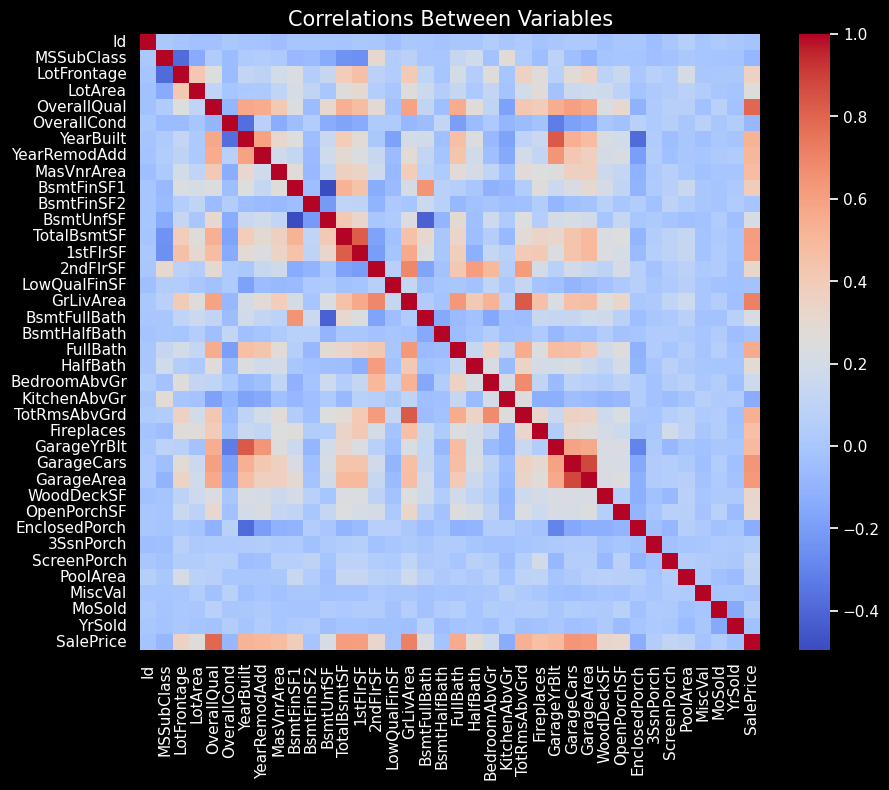

In [263]:
colors = sns.color_palette("coolwarm", as_cmap=True)

plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), cmap=colors)
plt.title("Correlations Between Variables", size=15)
plt.show()

In [264]:
important_num_cols = list(df.corr()["SalePrice"][(df.corr()["SalePrice"]>0.50) | (df.corr()["SalePrice"]<-0.50)].index)
cat_cols = ["MSZoning", "Utilities","BldgType","Heating","KitchenQual","SaleCondition","LandSlope"]
important_cols = important_num_cols + cat_cols

df = df[important_cols]

**Checking for the missing values**

In [265]:
print("Missing Values by Column")
print("-"*30)
print(df.isna().sum())
print("-"*30)
print("TOTAL MISSING VALUES:",df.isna().sum().sum())

Missing Values by Column
------------------------------
OverallQual      0
YearBuilt        0
YearRemodAdd     0
TotalBsmtSF      0
1stFlrSF         0
GrLivArea        0
FullBath         0
TotRmsAbvGrd     0
GarageCars       0
GarageArea       0
SalePrice        0
MSZoning         0
Utilities        0
BldgType         0
Heating          0
KitchenQual      0
SaleCondition    0
LandSlope        0
dtype: int64
------------------------------
TOTAL MISSING VALUES: 0


**Data Visualization**

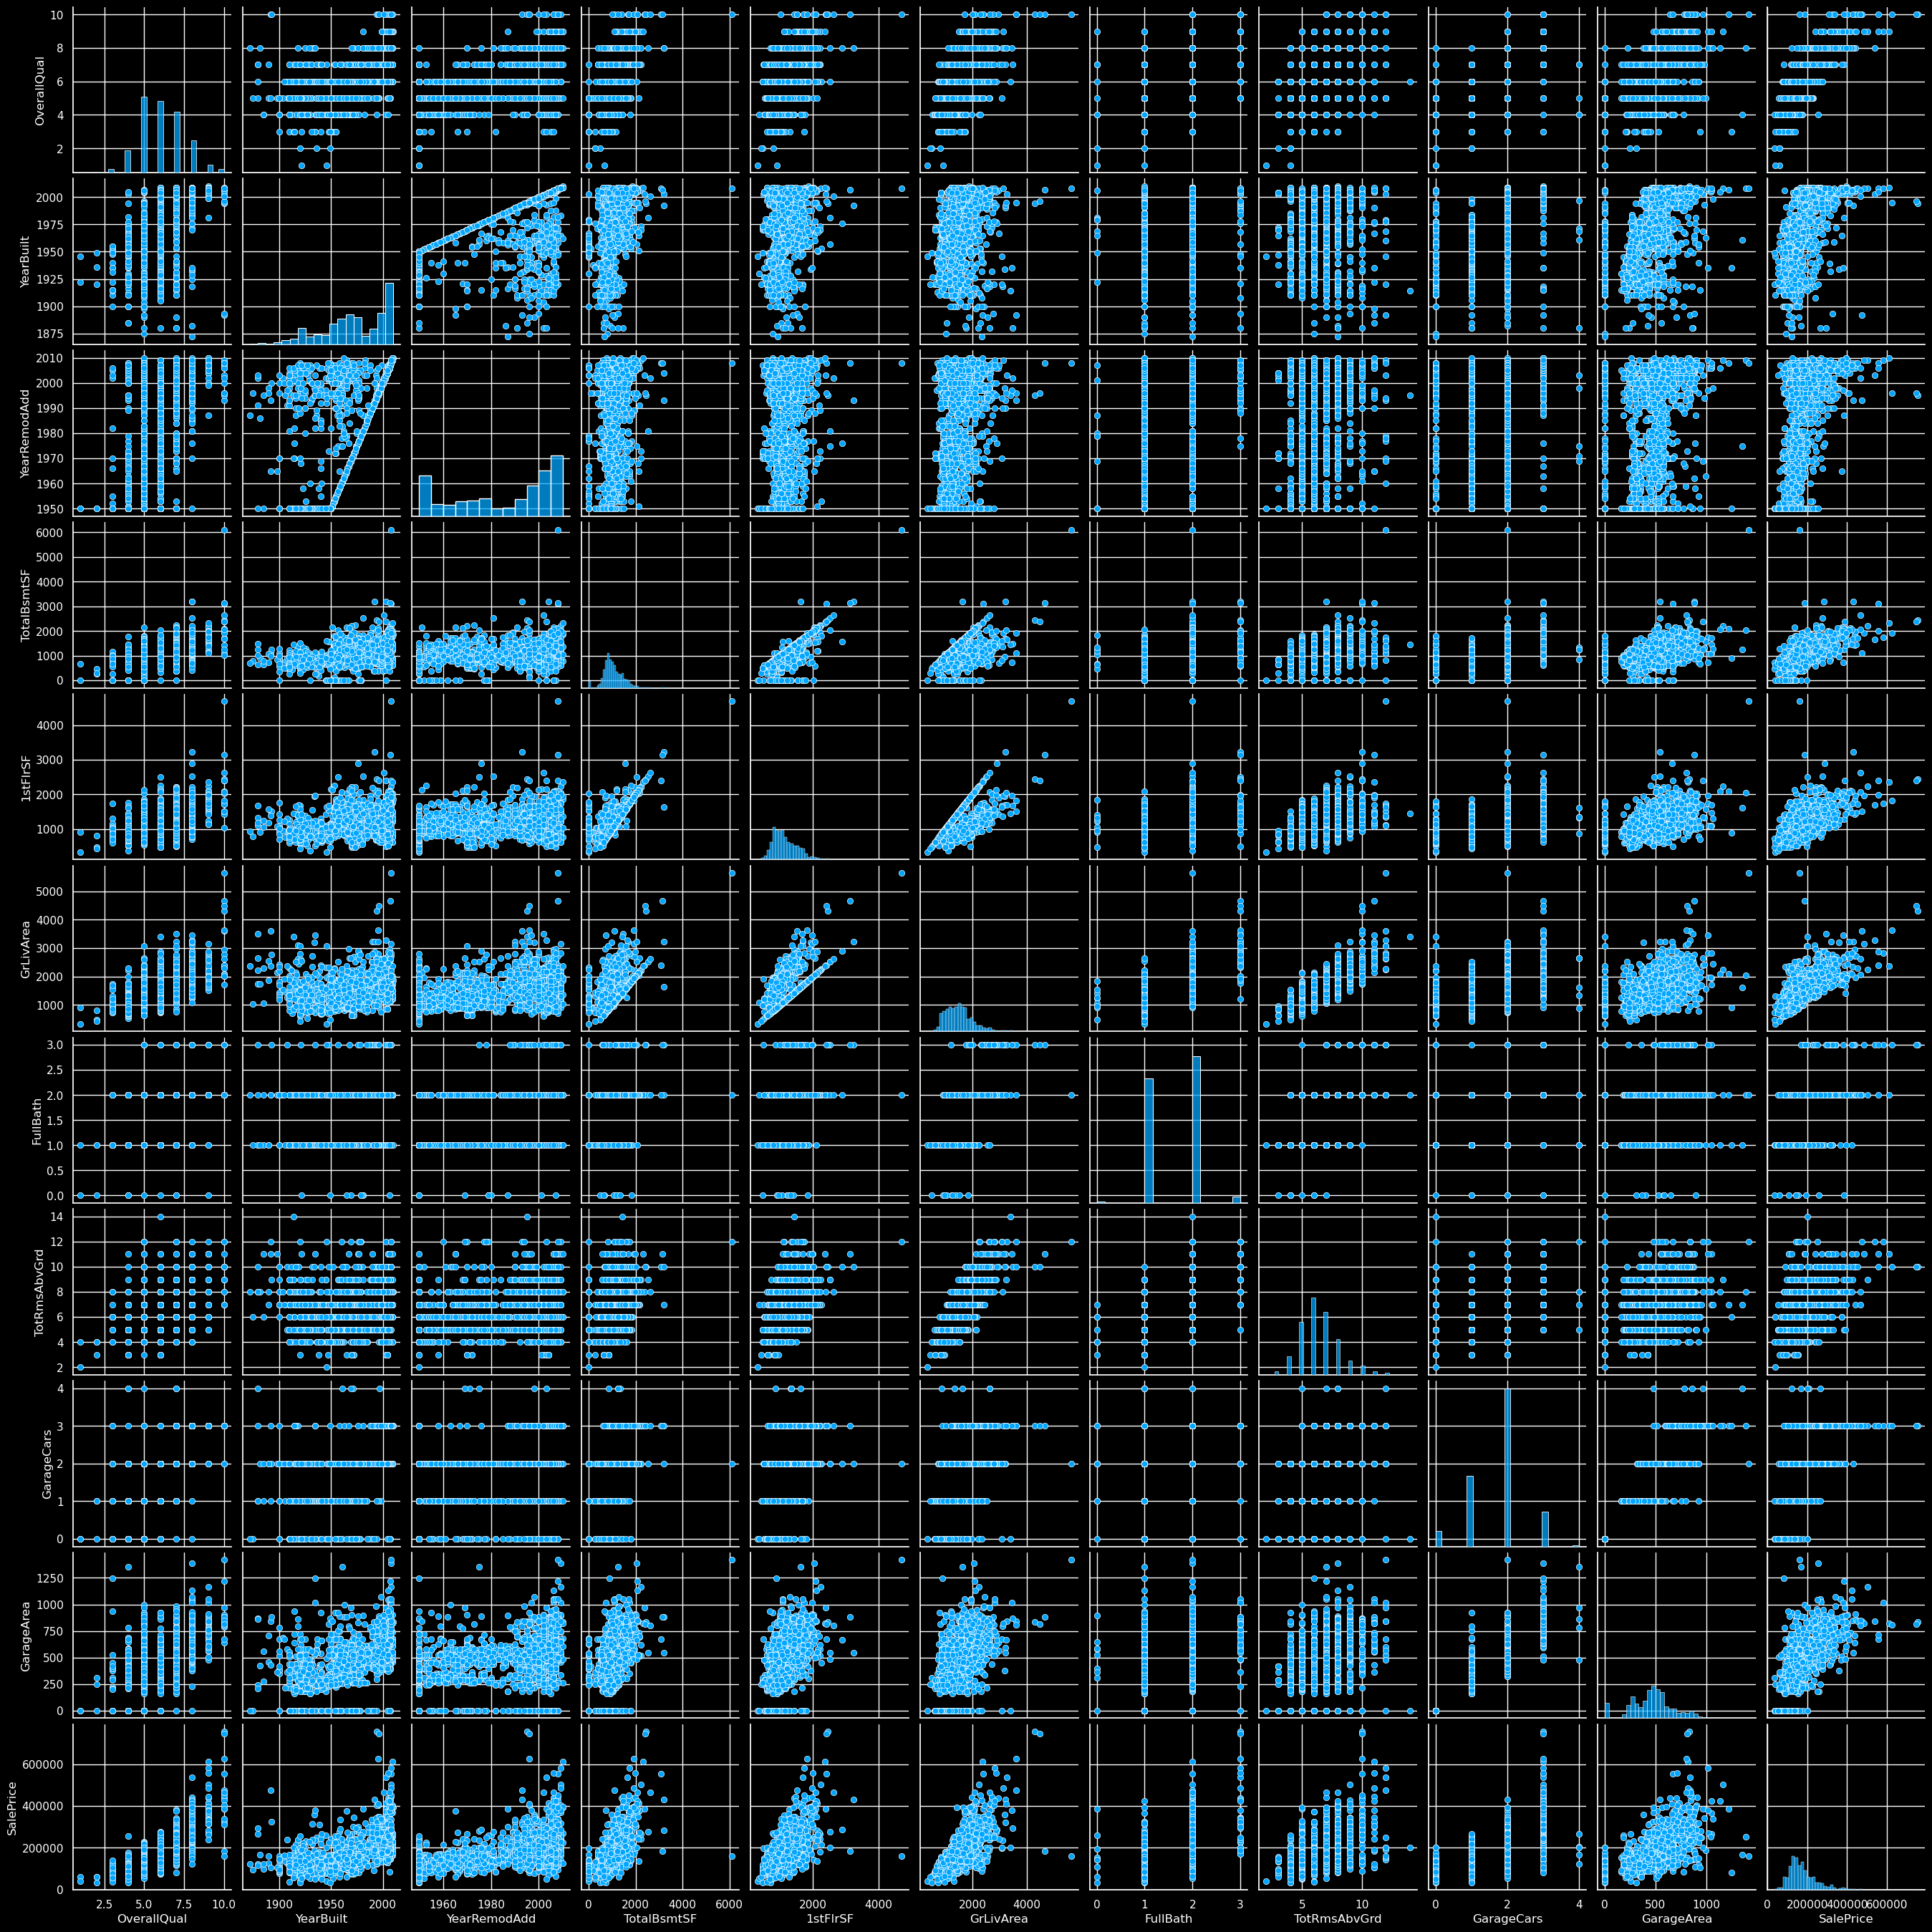

In [266]:
sns.pairplot(df[important_num_cols])
plt.style.use('dark_background')
plt.show()

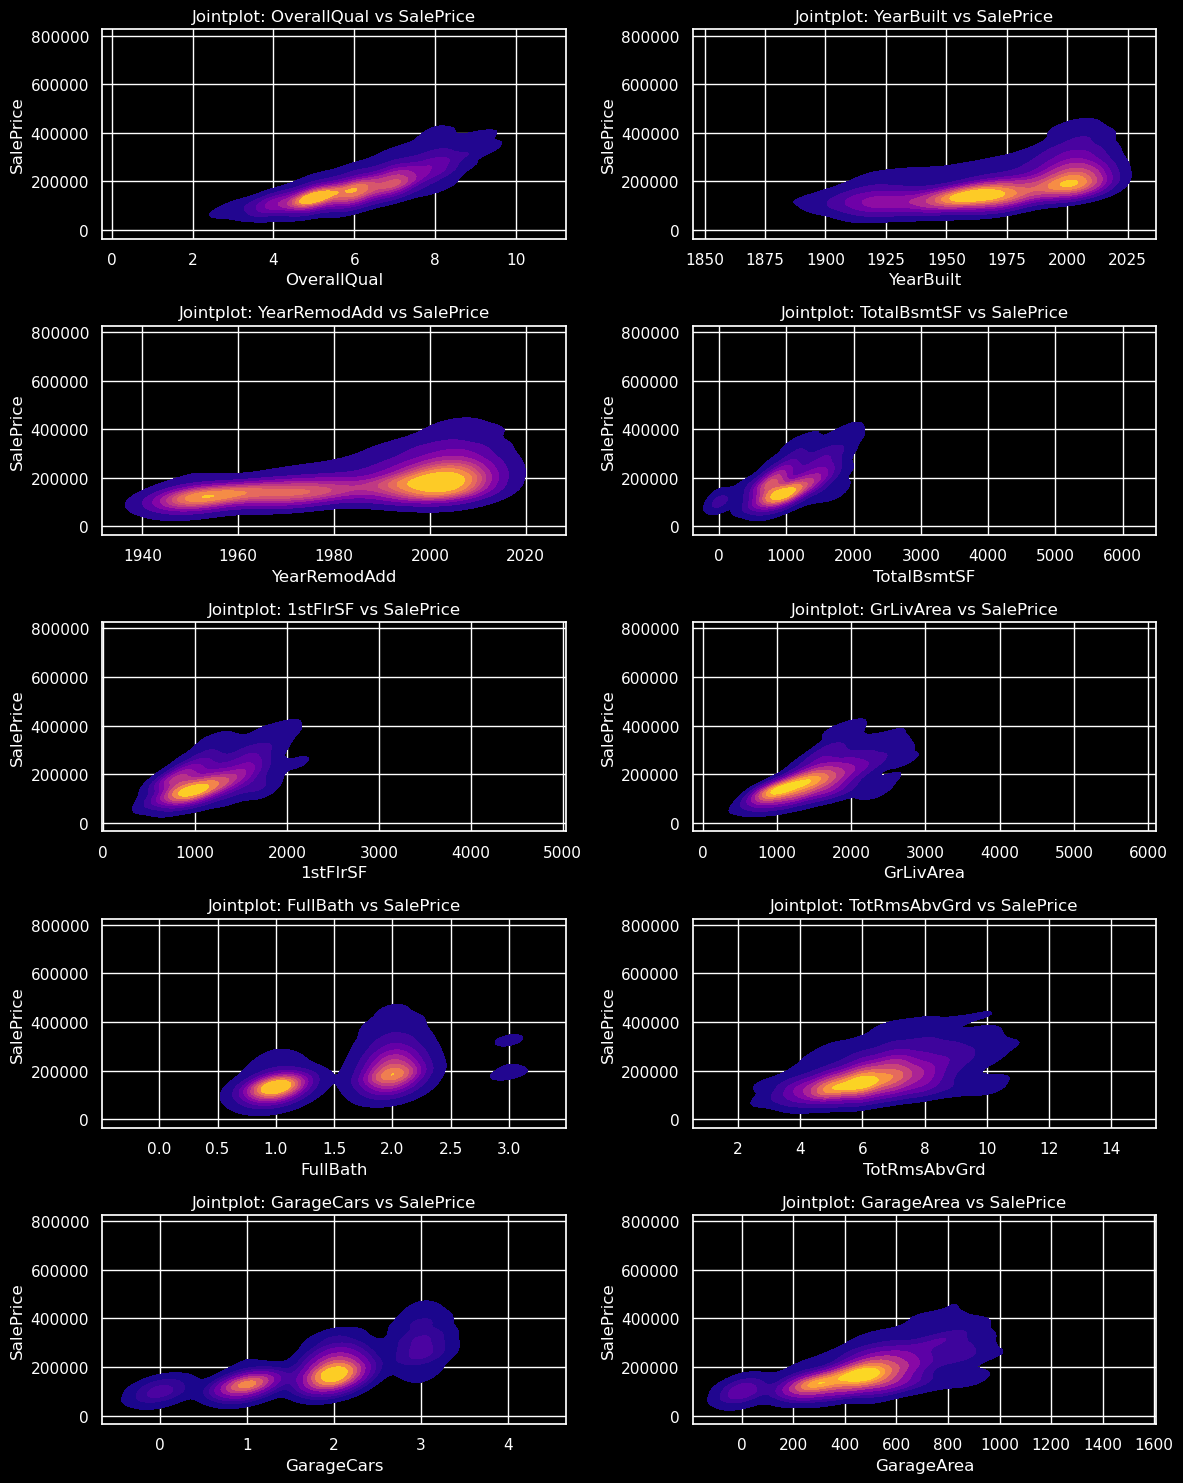

In [267]:
sns.set(style="darkgrid")
plt.style.use("dark_background")
sns.set_context("notebook")

num_columns = ["OverallQual", "YearBuilt", "YearRemodAdd", "TotalBsmtSF", "1stFlrSF",
               "GrLivArea", "FullBath", "TotRmsAbvGrd", "GarageCars", "GarageArea"]

fig, axes = plt.subplots(5, 2, figsize=(12, 15))

for i, column in enumerate(num_columns):
    row = i // 2
    col = i % 2
    sns.kdeplot(x=df[column], y=df["SalePrice"], ax=axes[row, col], fill=True, cmap="plasma")
    axes[row, col].set_xlabel(column)
    axes[row, col].set_ylabel("SalePrice")
    axes[row, col].set_title(f"Jointplot: {column} vs SalePrice")

plt.tight_layout()
plt.show()

In [268]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   OverallQual    1460 non-null   int64 
 1   YearBuilt      1460 non-null   int64 
 2   YearRemodAdd   1460 non-null   int64 
 3   TotalBsmtSF    1460 non-null   int64 
 4   1stFlrSF       1460 non-null   int64 
 5   GrLivArea      1460 non-null   int64 
 6   FullBath       1460 non-null   int64 
 7   TotRmsAbvGrd   1460 non-null   int64 
 8   GarageCars     1460 non-null   int64 
 9   GarageArea     1460 non-null   int64 
 10  SalePrice      1460 non-null   int64 
 11  MSZoning       1460 non-null   object
 12  Utilities      1460 non-null   object
 13  BldgType       1460 non-null   object
 14  Heating        1460 non-null   object
 15  KitchenQual    1460 non-null   object
 16  SaleCondition  1460 non-null   object
 17  LandSlope      1460 non-null   object
dtypes: int64(11), object(7)
memo

In [269]:
X = df.drop("SalePrice", axis=1)
y = df["SalePrice"]

In [270]:
X = pd.get_dummies(X, columns=cat_cols)

In [271]:
important_num_cols.remove("SalePrice")
scaler = StandardScaler()
X[important_num_cols] = scaler.fit_transform(X[important_num_cols])

In [272]:
X.head()

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea,...,KitchenQual_TA,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev
0,0.651479,1.050994,0.878668,-0.459303,-0.793434,0.370333,0.789741,0.912210,0.311725,0.351000,...,0,0,0,0,0,1,0,1,0,0
1,-0.071836,0.156734,-0.429577,0.466465,0.257140,-0.482512,0.789741,-0.318683,0.311725,-0.060731,...,1,0,0,0,0,1,0,1,0,0
2,0.651479,0.984752,0.830215,-0.313369,-0.627826,0.515013,0.789741,-0.318683,0.311725,0.631726,...,0,0,0,0,0,1,0,1,0,0
3,0.651479,-1.863632,-0.720298,-0.687324,-0.521734,0.383659,-1.026041,0.296763,1.650307,0.790804,...,0,1,0,0,0,0,0,1,0,0
4,1.374795,0.951632,0.733308,0.199680,-0.045611,1.299326,0.789741,1.527656,1.650307,1.698485,...,0,0,0,0,0,1,0,1,0,0


**Train Test Split**

In [273]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Defining several evaluation functions for convenience**

In [274]:
def rmse_cv(model):
    rmse = np.sqrt(-cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=5)).mean()
    return rmse
    

def evaluation(y, predictions):
    mae = mean_absolute_error(y, predictions)
    mse = mean_squared_error(y, predictions)
    rmse = np.sqrt(mean_squared_error(y, predictions))
    r_squared = r2_score(y, predictions)
    return mae, mse, rmse, r_squared

**Machine Learning models**

In [275]:
models = pd.DataFrame(columns=["Model","MAE","MSE","RMSE","R2 Score","RMSE (Cross-Validation)"])

**Linear regression**

In [276]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
predictions = lin_reg.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
lr_rmse_cross_val = rmse_cv(lin_reg)
print("RMSE Cross-Validation:", lr_rmse_cross_val)

new_row = {"Model": "LinearRegression","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)

MAE: 23567.89056594339
MSE: 1414931404.6297858
RMSE: 37615.57396384888
R2 Score: 0.8155317822983865
------------------------------
RMSE Cross-Validation: 36478.619347035594


**Random Forest Regressor**

In [277]:
random_forest = RandomForestRegressor(n_estimators=100)
random_forest.fit(X_train, y_train)
predictions = random_forest.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rf_rmse_cross_val = rmse_cv(random_forest)
print("RMSE Cross-Validation:", rf_rmse_cross_val)

new_row = {"Model": "RandomForestRegressor","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)

MAE: 18224.969142204827
MSE: 971730833.3864096
RMSE: 31172.59747577044
R2 Score: 0.8733129716861463
------------------------------
RMSE Cross-Validation: 31371.74120524702


**XGB Regressor**

In [278]:
xgb = XGBRegressor(n_estimators=1000, learning_rate=0.01)
xgb.fit(X_train, y_train)
predictions = xgb.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
xgb_rmse_cross_val = rmse_cv(xgb)
print("RMSE Cross-Validation:", xgb_rmse_cross_val)

new_row = {"Model": "XGBRegressor","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)

MAE: 17439.918396832192
MSE: 716579004.5214689
RMSE: 26768.993341578403
R2 Score: 0.9065777666861116
------------------------------
RMSE Cross-Validation: 29686.71874969576


**Model Comparison**

In [279]:
models = [
    {"model": "LinearRegression", "RMSE (Cross-Validation)": lr_rmse_cross_val},
    {"model": "RandomForestRegressor", "RMSE (Cross-Validation)": rf_rmse_cross_val},
    {"model": "XGBRegressor", "RMSE (Cross-Validation)": xgb_rmse_cross_val}]

In [280]:
sorted_models = sorted(models, key=lambda x: x["RMSE (Cross-Validation)"])
for model in sorted_models:
    print(model)

{'model': 'XGBRegressor', 'RMSE (Cross-Validation)': 29686.71874969576}
{'model': 'RandomForestRegressor', 'RMSE (Cross-Validation)': 31371.74120524702}
{'model': 'LinearRegression', 'RMSE (Cross-Validation)': 36478.619347035594}


In [281]:
model_names = [model["model"] for model in models]
rmse_values = [model["RMSE (Cross-Validation)"] for model in models]

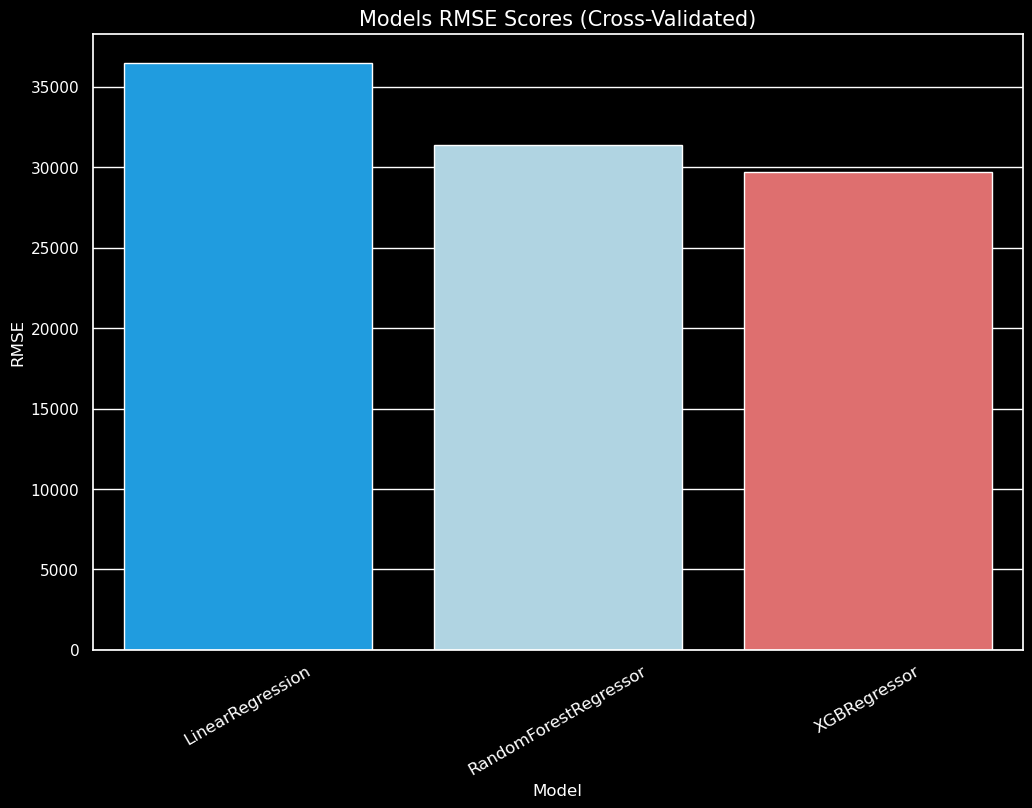

In [282]:
futuristic_colors = ["#00A6FF", "#A8D8EA", "#F05C5C", "#FFD700", "#C3E8BD"]
plt.figure(figsize=(12, 8))
sns.set_palette(futuristic_colors)
sns.barplot(x=model_names, y=rmse_values)
plt.title("Models RMSE Scores (Cross-Validated)", size=15)
plt.xticks(rotation=30, size=12)
plt.ylabel("RMSE", size=12)
plt.xlabel("Model", size=12)
plt.show()

In [283]:
print(test_id,predictions)

0       1461
1       1462
2       1463
3       1464
4       1465
        ... 
1454    2915
1455    2916
1456    2917
1457    2918
1458    2919
Name: Id, Length: 1459, dtype: int64 [141342.8   319150.12  109050.21  156048.    331442.84   78543.83
 203111.45  152177.62   77336.98  127517.91  150988.52  118985.24
 105639.45  215915.38  170629.69  134695.44  197237.67  144508.02
 118476.95  202375.88  186137.86  217829.08  176519.58  133835.97
 198699.53  169781.58  198027.27   95739.59  185221.77  201828.48
 127098.664 233860.34  222991.64  117448.49  254919.4   144382.66
 158819.56  214158.53  291414.2   101008.945 125378.23  234028.08
 122991.445 408575.6   134113.4   131812.02  118426.23  124027.58
 431998.56  133672.3   120291.89  208362.47  104342.875 309571.62
 141007.78  241118.98  186399.67  149951.98  145078.2   109241.78
  71113.695 154275.66  323075.7   288085.3   302107.16  241464.19
 117288.87  322239.6   118113.65  160484.64  123029.234 127645.48
 113008.5    93492.02  53351

In [284]:
print(submission)

        Id      SalePrice
0     1461  169277.052498
1     1462  187758.393989
2     1463  183583.683570
3     1464  179317.477511
4     1465  150730.079977
...    ...            ...
1454  2915  167081.220949
1455  2916  164788.778231
1456  2917  219222.423400
1457  2918  184924.279659
1458  2919  187741.866657

[1459 rows x 2 columns]


In [286]:
submission.to_csv('submission.csv', index=False)